In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd    
import numpy as np

In [5]:

data = fetch_california_housing(as_frame=True)
print(data)
print('-'*66)
df = data.frame
print(df.head())  

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

✅ Dataset loaded: (569, 31)
Target labels: {0: 'malignant', 1: 'benign'}


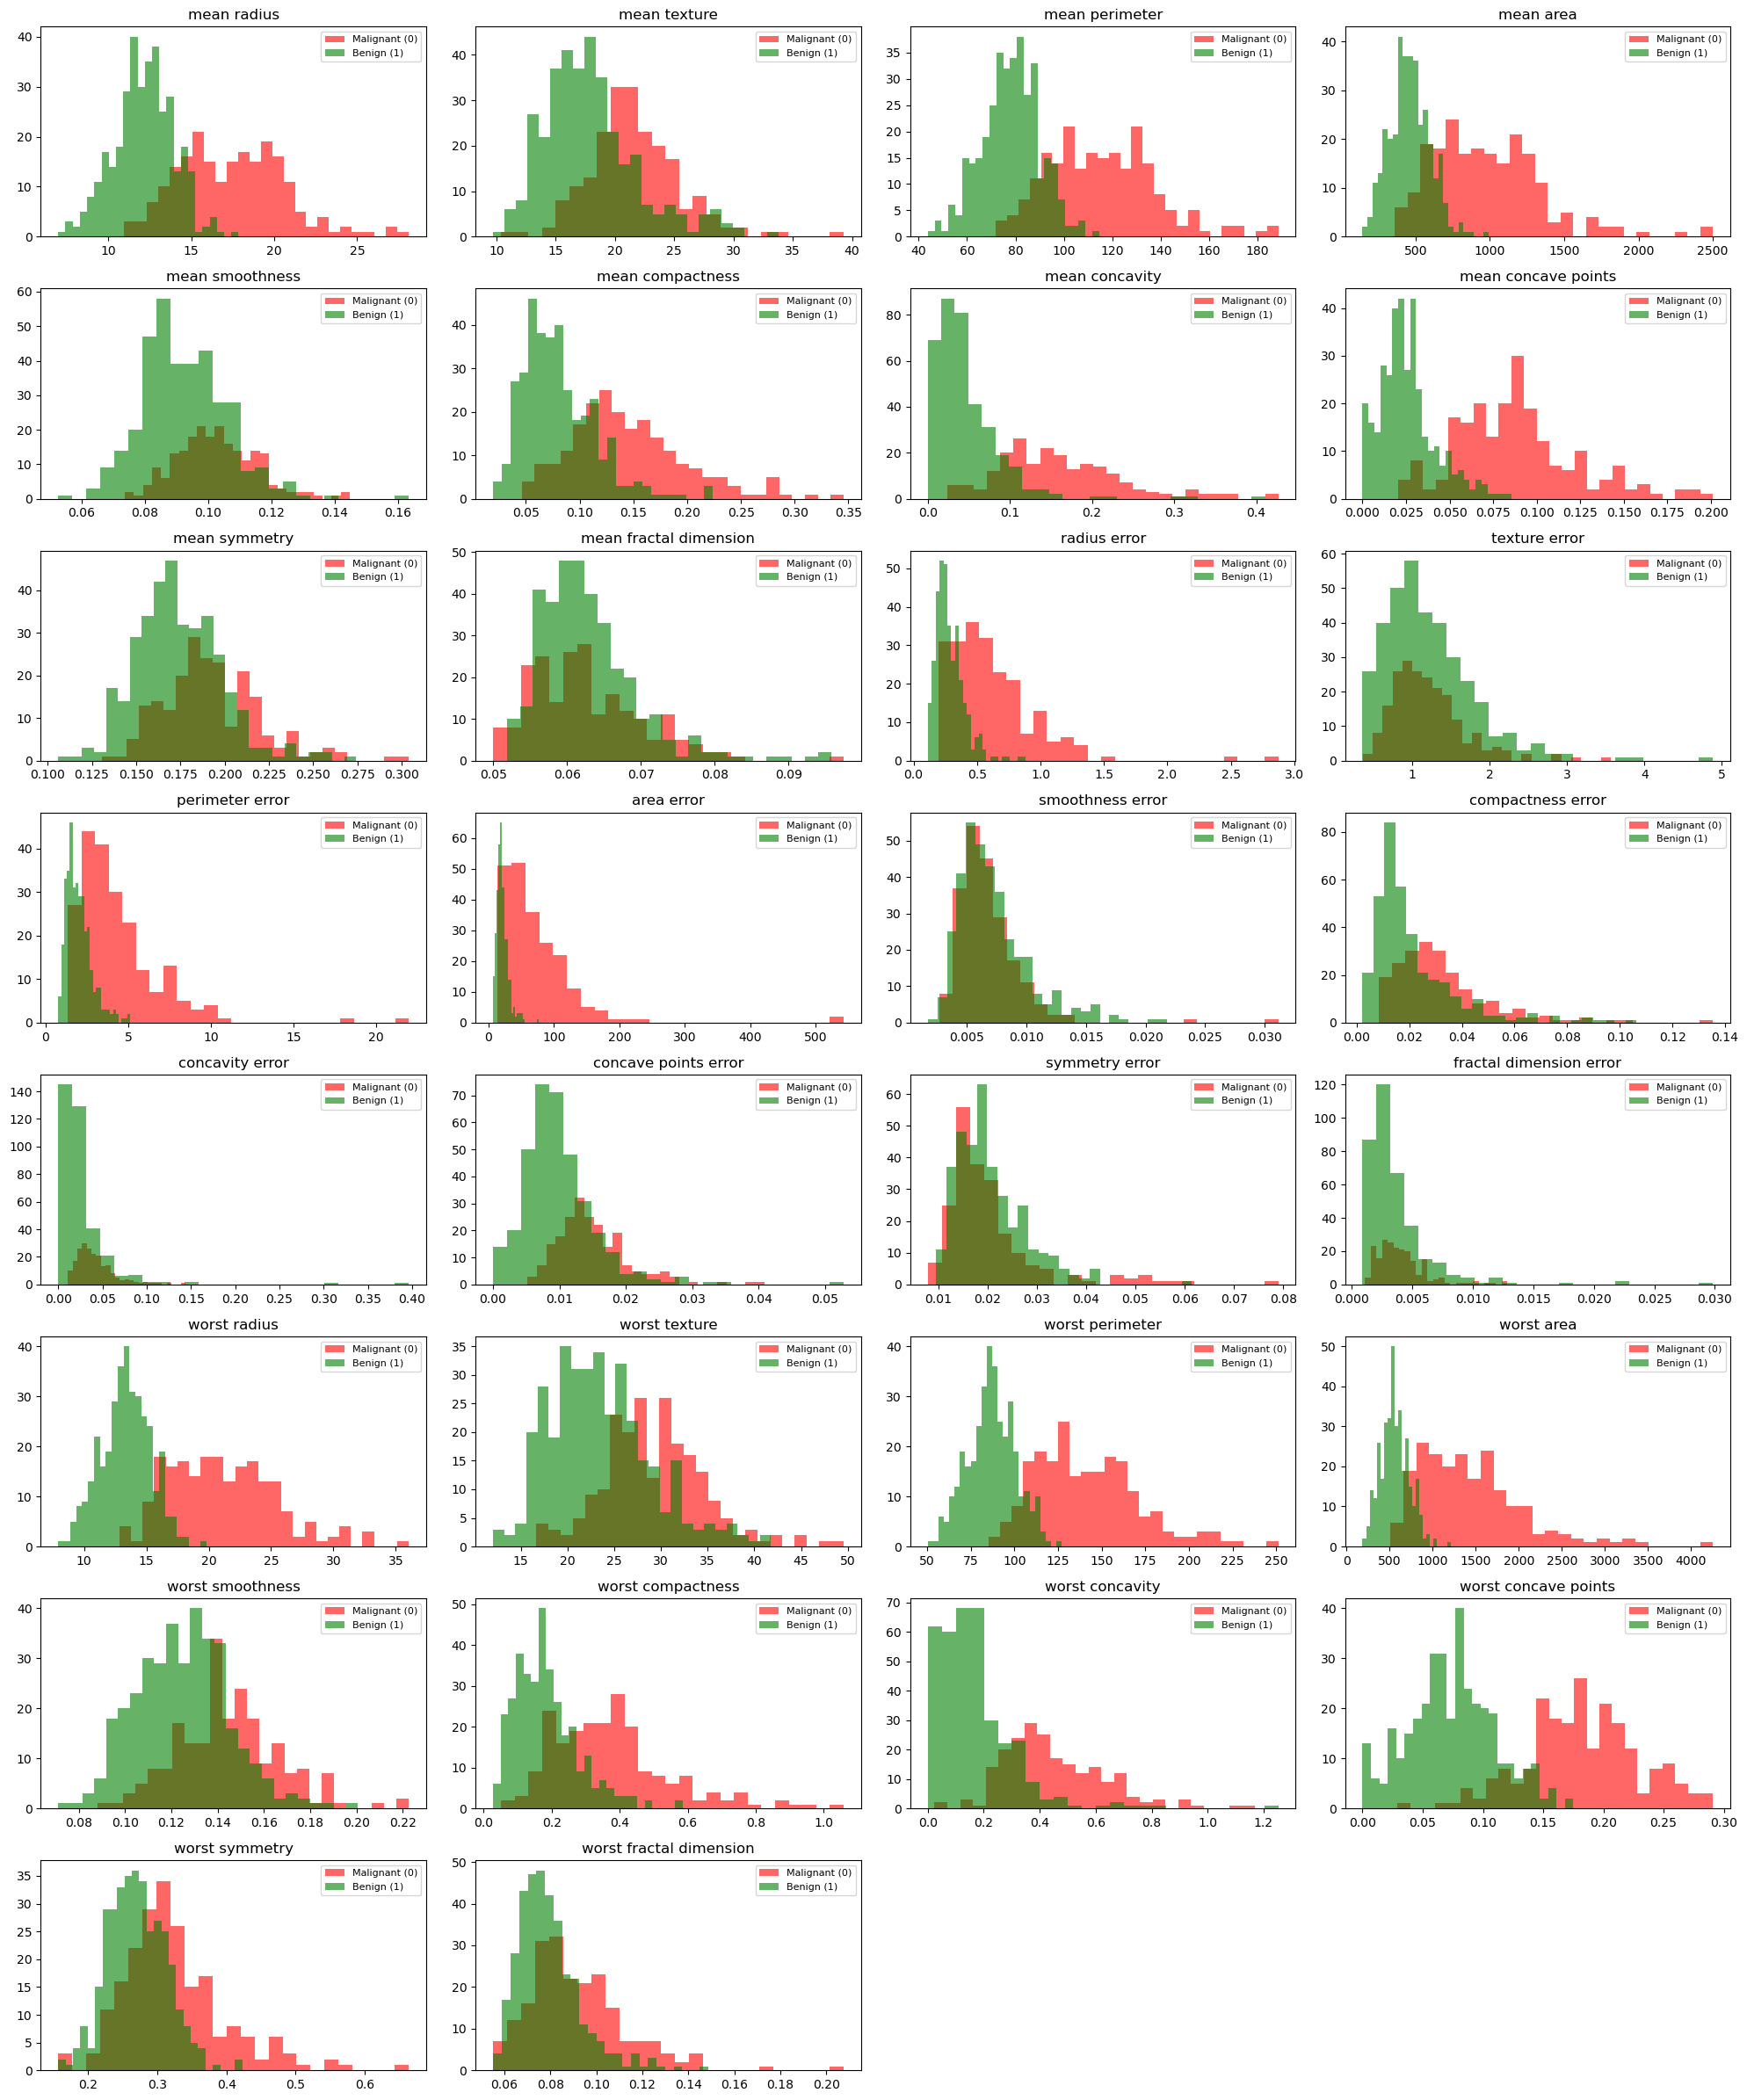

In [ ]:


df.head()

In [4]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [6]:
# Check the distribution of the target variable (median house value)
import matplotlib.pyplot as plt
import seaborn as sns

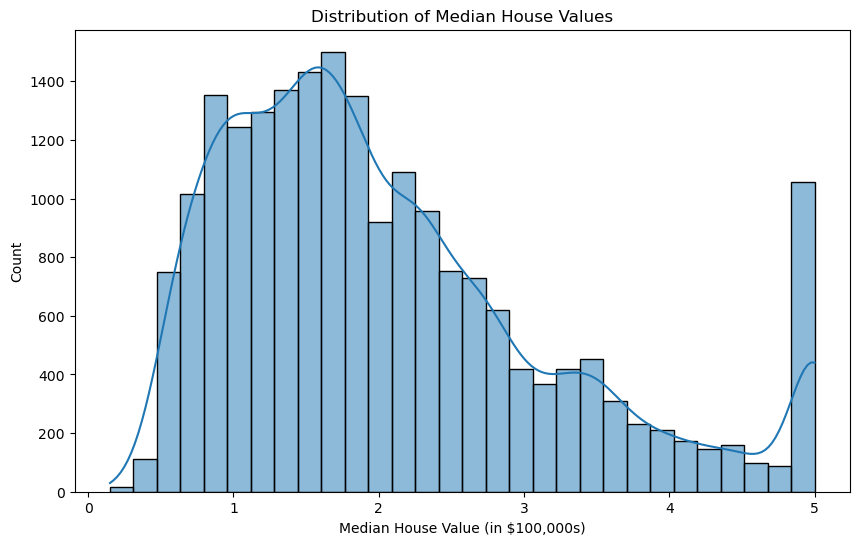

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Count')
plt.show()

In [8]:
df = df[df['MedHouseVal'] < 5]

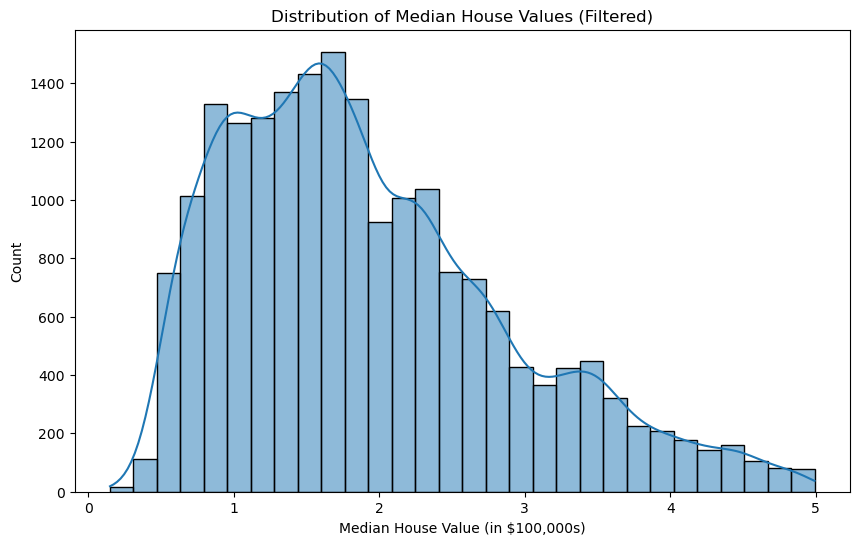

In [9]:
# Let's check the new distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MedHouseVal'], kde=True, bins=30)
plt.title('Distribution of Median House Values (Filtered)')
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Count')
plt.show()

In [10]:
x=df.drop('MedHouseVal',axis=1)

y=df['MedHouseVal']


 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [12]:

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)



scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Training data shape: (15718, 8)
Testing data shape: (3930, 8)


In [39]:

print("\nExample of scaled features (first 5 rows):")
print(X_train_scaled[:5])
 


Example of scaled features (first 5 rows):
[[-1.28321544 -0.67451143 -0.3129519  -0.23619313 -0.13486257  0.06695351
   1.381953   -0.94167667]
 [-0.14651851  0.52401112 -0.39885582 -0.2453078  -0.08936387 -0.04259981
  -1.31780558  1.18022803]
 [ 0.19910095  0.52401112 -0.31962336 -0.23616052 -0.88516189 -0.08686509
   1.06597437 -1.47589738]
 [-0.59680947  1.00342014  0.01803603  0.0993594  -0.59500037 -0.01047041
  -0.80201693  0.63102917]
 [ 1.80433959  0.28430661  0.90255669 -0.17670604 -0.72291181 -0.04396756
   1.0473874  -1.35607217]]


In [40]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [48]:
knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

y_pred


array([2.939 , 3.008 , 2.167 , ..., 1.1406, 1.6932, 2.002 ], shape=(3930,))

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("KNN Model Performance:")
print(f"RMSE: {rmse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R²:   {r2:.3f}")


KNN Model Performance:
RMSE: 0.581
MAE:  0.415
R²:   0.648


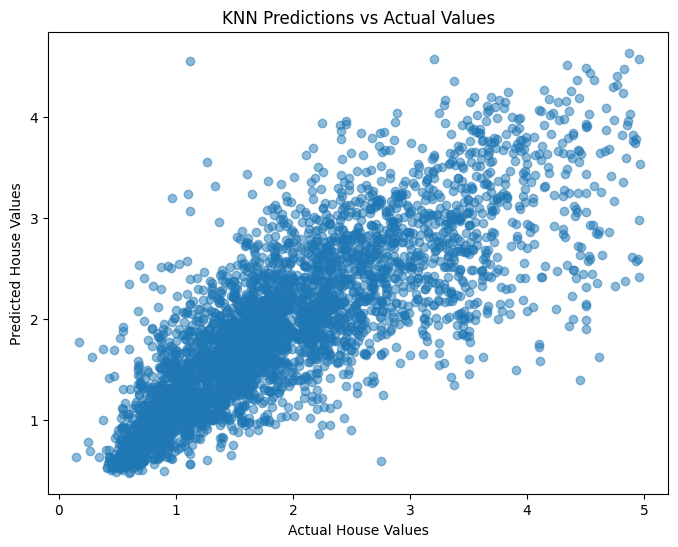

In [51]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Values")
plt.ylabel("Predicted House Values")
plt.title("KNN Predictions vs Actual Values")
plt.show()


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test these numbers of neighbors
    'weights': ['uniform', 'distance'],  # How to weight the neighbors
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # We'll use negative MSE (higher is better)
    verbose=1,  # Shows progress
    n_jobs=-1  # Uses all CPU cores
)

# Fit the grid search to the data
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_knn.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nTest RMSE with best model: {test_rmse:.4f}")

Starting grid search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters found:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best RMSE: 0.5431

Test RMSE with best model: 0.5414


C:\Users\HP\AppData\Local\Temp\ipykernel_8892\983229993.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


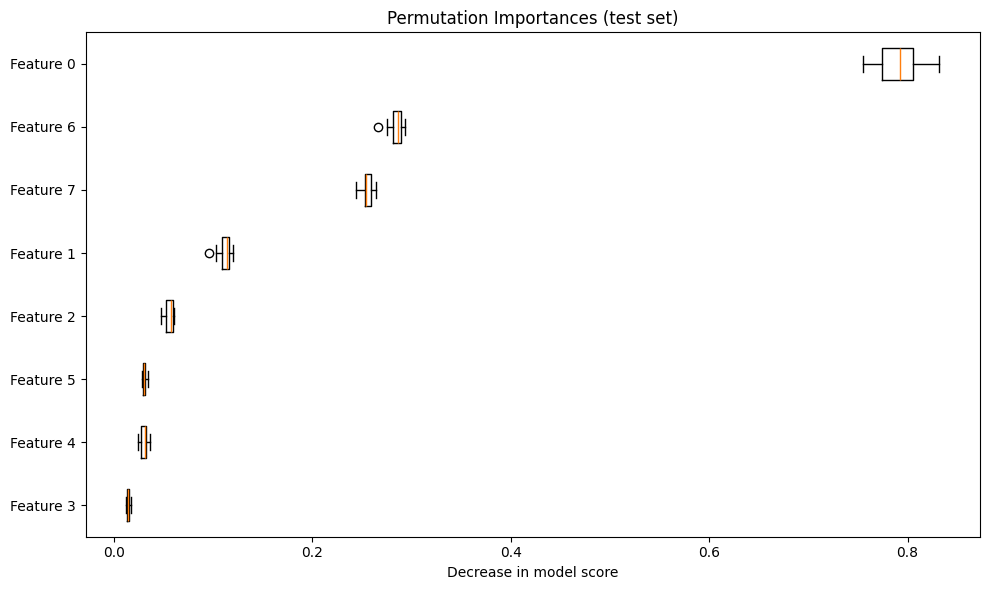

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances using permutation importance
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(
    best_knn, X_test_scaled, y_test,
    n_repeats=10,  # Number of permutations
    random_state=42,
    n_jobs=-1
)

# Get feature names (if available) or use generic names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Sort features by importance
sorted_idx = result.importances_mean.argsort()

# Create the plot
plt.figure(figsize=(10, 6))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[sorted_idx]
)
plt.title("Permutation Importances (test set)")
plt.xlabel("Decrease in model score")
plt.tight_layout()
plt.show()

In [54]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Training Random Forest model...

Random Forest Performance:
RMSE: 0.4653
R²:   0.7742


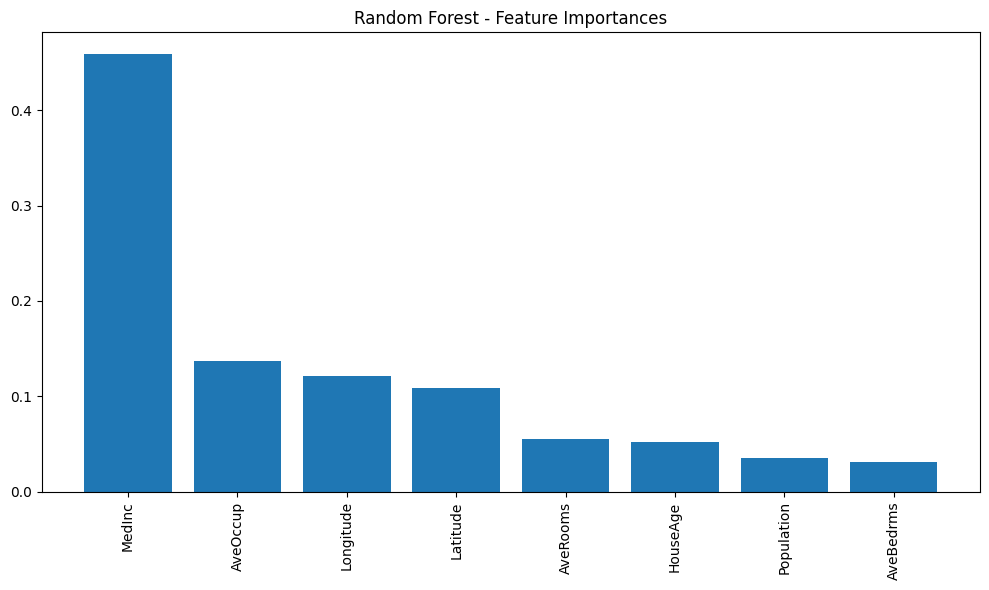

In [58]:
# Create and train the model
rf = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    random_state=42,    # For reproducibility
    n_jobs=-1          # Use all CPU cores
)

print("Training Random Forest model...")
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R²:   {r2_rf:.4f}")

# Get feature names (from the original X before scaling)
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature {i}' for i in range(X_train_scaled.shape[1])]

# Plot feature importance
plt.figure(figsize=(10, 6))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.title("Random Forest - Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()

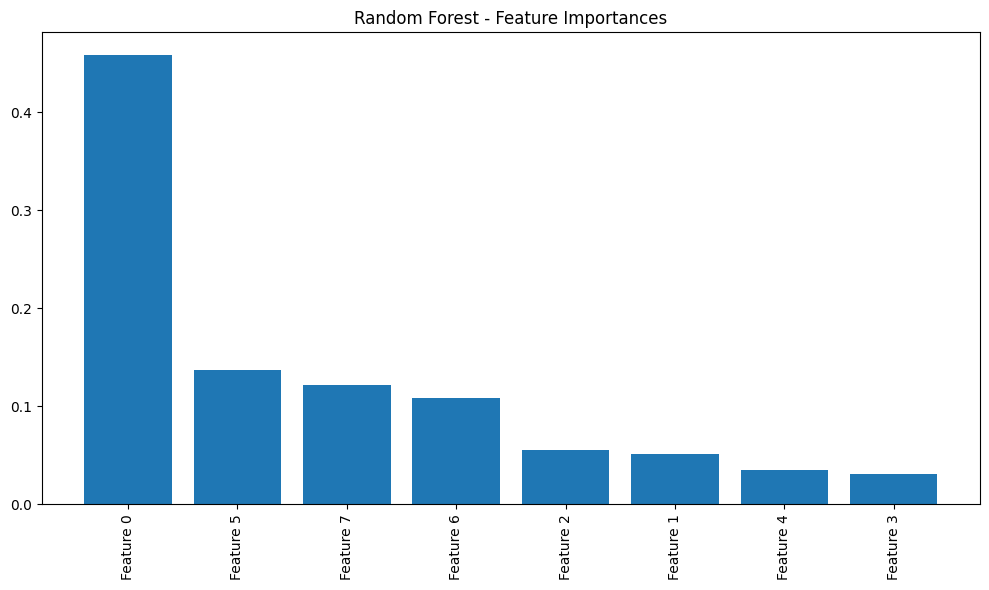

In [61]:
# Get feature importances
importances = rf.feature_importances_

# Get feature names (handle both DataFrame and array inputs)
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.title("Random Forest - Feature Importances")
plt.tight_layout()
plt.show()

In [63]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

class KNN:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X = np.array(X)  # Convert to numpy array
        self.y = np.array(y)  # Convert to numpy array
    
    def predict(self, X_test):
        X_test = np.array(X_test)  # Ensure input is numpy array
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = np.linalg.norm(self.X - x, axis=1)
        k_indices = np.argpartition(distances, self.k)[:self.k]
        k_nearest = self.y[k_indices]
        return np.mean(k_nearest)

# Load and prepare data
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to numpy arrays to be safe
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Test our KNN
print("Testing our KNN...")
knn = KNN(k=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Our KNN RMSE: {rmse:.4f}")

# Compare with scikit-learn's KNN
print("\nTesting scikit-learn's KNN...")
from sklearn.neighbors import KNeighborsRegressor
sk_knn = KNeighborsRegressor(n_neighbors=5)
sk_knn.fit(X_train_scaled, y_train)
y_pred_sk = sk_knn.predict(X_test_scaled)
rmse_sk = np.sqrt(mean_squared_error(y_test, y_pred_sk))
print(f"Scikit-learn KNN RMSE: {rmse_sk:.4f}")

Testing our KNN...
Our KNN RMSE: 0.6576

Testing scikit-learn's KNN...
Scikit-learn KNN RMSE: 0.6576
